# Teoria de la Información de Shannon

- Link [Teoria de la informacion](https://relopezbriega.github.io/blog/2018/03/30/introduccion-a-la-teoria-de-la-informacion-con-python/)





## Entropia de la informacion

La idea central de la Teoría de la información de Shannon es la Entropía. La información y la Entropía están intimimamente relacionadas, ya que esta última es en sí misma una medida de información. Cuando Shannon comenzó a desarrollar su teoría, encontró una formula que le permitía analizar la información en un mensaje en términos de Bits. Esta formula que encontró mide, a grandes rasgos, cuan poco predecible es una cadena de Bits. Mientras menos predecible, existen menos probabilidades de poder generar el mensaje completo desde una cadena más pequeña de Bits. Es decir, que al intentar medir cuan poco predecible es una cadena de Bits,  Shannon esperaba poder encontrar cuánta información contenía el mensaje. Ahora bien, ¿cuál es la cadena de 0s y 1s menos probables? Pues aquella que sea completamente aleatoria, como cuando lanzamos una moneda al aire y tenemos 50% de probabilidades de obtener cara o seca. 

Mientras más aleatoria es una cadena de símbolos, es menos predecible y menos redundante; y por lo tiende a contener una mayor cantidad de información por símbolo. Si bien esto parece una paradoja, ¿cómo algo que es completamente aleatorio contiene más información que algo que no lo es? Acoso, ¿lo aleatorio no es no lo contrario de información? Parece ser contra intuitivo, pero en realidad no lo es. Se puede observar facílmente con un ejemplo. Supongamos que arrojamos una moneda al aire 16 veces y representamos a la cara con un 1 y a la seca con un 0. Podemos obtener una cadena como la siguiente: 1101001110001011. Esta cadena es aleatoria y por lo tanto no podemos encontrar ningún patrón en ella que nos diga cuál va a ser el próximo valor que podemos obtener más alla de la chance de 50% habitual, por tal motivo, no podemos comprimir la cadena y cada símbolo contiene un Bit de información. Ahora supongamos que la moneda esta sesgada y que siempre sale cara; en este caso nuestra cadena será la siguiente: 1111111111111111. Esta cadena es sumamente predecible, no nos aporta ninguna sorpresa y tenemos una probabilidad de 100% de adivinar que el siguiente dígito también será un 1. Es totalmente redundante y por lo tanto no nos aporta ninguna información. Cada símbolo contiene un Bit de información. Sin sorpresa, no hay información.

La fórmula matemática que encontró Shannon para medir la Entropía de un mensaje es muy similar a la que se utiliza en Termodinámica para medir el grado de desorden de un sistema. Es la siguiente:

$H(x)=−\sum_{i}^{}{p(i)\log_2 p(i)}$

Cuando Shannon se dio cuenta de que la Entropía de una secuencia de símbolos estaba relacionada con la cantidad de información que la cadena de símbolos tiende a contener, de repente tuvo una herramienta para cuantificar la información y la redundancia en un mensaje. Fue capaz de demostrar, matemáticamente, cuánta información puede transmitirse en cualquier medio y que existe un límite fundamental para la cantidad de información que puede transmitir con un equipo determinado.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings

# ingnorar mensajes de advertencias en el notebook
warnings.filterwarnings('ignore')

# graficos en el notebook
%matplotlib inline


def entropia(X):
    """Devuelve el valor de entropia de una muestra de datos""" 
    probs = [np.mean(X == valor) for valor in set(X)]
    return round(np.sum(-p * np.log2(p) for p in probs), 3)


def entropia_prob_pq(x):
    """Devuelve la entropia de una probabilidad de dos posibilidades"""
    return round((-x * np.log2(x)) + (-(1 - x ) * np.log2((1 - x))), 3)


def entropia_posibilidades(x):
    """Devuelve la entropía para la cantidad de posibilidades independientes x"""
    return round(np.log2(x), 3)

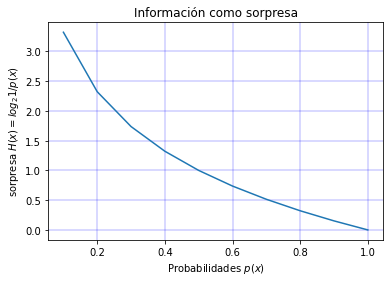

In [2]:
# Graficando la información como sorpresa
# Mientras menos probable, más sorpresa y más información contiene.
vent = np.vectorize(entropia_posibilidades)

X = np.linspace(0, 1, 11)

plt.plot(X, vent(X)*-1)
plt.title("Información como sorpresa")
plt.grid(color='b', linestyle='-', linewidth=.3)
plt.xlabel(r'Probabilidades $p(x)$')
plt.ylabel(r'sorpresa $H(x) = log_2 1/p(x)$')
plt.show()

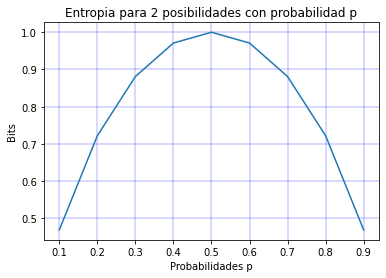

In [3]:
# Graficando la entropia en el caso de 2 posibilidades con
# probabilidad p y (1- p)

# vectorizar la función para poder pasarle un vector de parámetro
vent = np.vectorize(entropia_prob_pq)

X = np.linspace(0, 1, 11)

plt.plot(X, vent(X))
plt.title("Entropia para 2 posibilidades con probabilidad p")
plt.grid(color='b', linestyle='-', linewidth=.3)
plt.xlabel('Probabilidades p')
plt.ylabel('Bits')
plt.show()

In [4]:
# La entropia de una muestra de 2 posibilidades completamente
# aleatorias, en la que cualquiera de los 2 valores tiene la 
# misma probabilidad (p=0.5) de ser seleccionada es de 1 bit

# Muestra de 10000 valores aleatorios entre 0 y 1
X = np.random.randint(0, 2, size=10000)

entropia(X), entropia_posibilidades(2)

(1.0, 1.0)

In [5]:

# La entropia de una muestra de 8 posibilidades completamente
# aleatorias es igual a 3 bits.

# Muestra de 10000 valores aleatorios entre 0 y 7
X = np.random.randint(0, 8, size=10000)

entropia(X), entropia_posibilidades(8)

(3.0, 3.0)

## Redundancia

Otro de los conceptos fundamentales de la Teoría de la información es el de Redundancia. La Redundancia son esas pistas adicionales en una sentencia o mensaje que nos permiten entender su significado incluso si el mensaje esta incompleto o distorsionado; son esos caracteres extra en una cadena de símbolos, la parte predecible que nos permite completar la información faltante. Cualquier sentencia de cualquier lenguaje es altamente redundante. Todo sentencia nos proporciona información adicional para que podemos descifrarla. Esta Redundancia es fácil de ver, simplemente tr-t- d- l--r -st- m-ns-j-. A pesar de que quitemos todas la vocales, igualmente se podemos entender la sentencia.

Para nosotros, la redundancia del lenguaje es algo bueno, porque hace que un mensaje sea más fácil de comprender incluso cuando el mensaje está parcialmente modificado por el entorno. Podemos entender a un amigo hablando en un restaurante abarrotado de gente o hablando con un teléfono celular con mucha estática gracias a la Redundancia . La Redundancia es un mecanismo de seguridad; nos asegura que el mensaje se transmita incluso si se daña levemente en el camino. Todos los idiomas tienen estas redes de seguridad integradas compuestas de patrones, estructuras y un conjunto de reglas que los hacen redundantes. Usualmente no estamos al tanto de esas reglas, pero nuestro cerebro las usa inconscientemente mientras leemos, hablamos, escuchamos y escribimos.

Cuando eliminamos toda la redundancia en una cadena de símbolos, lo que queda es su núcleo concreto y cuantificable. Eso es la información, ese algo central e irreductible que se encuentra en la esencia de toda sentencia.

## Información e incertidumbre

Nuestra experiencia del mundo nos lleva a concluir que muchos eventos son impredecibles y algunas veces bastante inesperados. Estos pueden variar desde el resultado de simples juegos de azar como arrojar una moneda e intentar adivinar si será cara o cruz, al colapso repentino de los gobiernos, o la caída dramática de los precios de las acciones en el mercado bursátil. Cuando tratamos de interpretar tales eventos, es probable que tomemos uno de dos enfoques: nos encogeremos de hombros y diremos que fue por casualidad o argumentaremos que podríamos haber sido más capaces de predecir, por ejemplo, el colapso del gobierno si hubiéramos tenido más información sobre las acciones de ciertos ministros. En cierto sentido, podemos decir que estos dos conceptos de información e incertidumbre están más estrechamente relacionados de lo que podríamos pensar. De hecho, cuando nos enfrentamos a la incertidumbre, nuestra tendencia natural es buscar información que nos ayude a reducir esa incertidumbre en nuestras mentes. Las herramientas que nos proporciona la Teoría de la información están en las bases de todos los modelos que desarrollamos para intentar predecir y lidiar con la incertidumbre del futuro.

## Juego

### Adivina el numero

In [6]:
import random

random.seed(1982)


def adivinar_numero():
    mi_numero = random.randint(1, 1000)
    bits = 1
    tu_numero = int(input("Adivine un número entero entre 1 y 1000\nIngrese un número entre 1 y 1000: "))
    
    while tu_numero != mi_numero:
        if tu_numero < mi_numero:
            tu_numero = int(input("Su número es muy bajo!\nIngrese otro número entre 1 y 1000:"))
        else:
            tu_numero = int(input("Su número es muy alto!\nIngrese otro número entre 1 y 1000:"))
        bits += 1
    
    print("Felicidades el número es {0} y ha utilizado {1} bits!".format(mi_numero, bits))

In [7]:
## adivinar_numero()

## Juego

### Adivina el nombre

In [8]:
def adivinar_nombre():
    nombres = [
    "ramses", "rodolfo", "regina", "ruth", "ramiro",
    "ramon", "roxana", "rebeca", "raquel", "ruben",
    "rosario", "renata", "raul", "romina", "roberto",
    "ricardo", "rafael", "rosa", "rodrigo", "rocio"
    ]
    index = random.randint(0, 19)
    mi_nombre = nombres[index]
    tu_nombre = input("Adivina el nombre! Empieza con R y tiene {} letras: ".format(len(mi_nombre)))
    letras = 2
    bits = 1
    
    while tu_nombre.lower() != mi_nombre:
        mi_nombre_parcial = mi_nombre[:letras]
        if mi_nombre_parcial == mi_nombre:
            break
        
        tu_nombre = input("Inténtalo otra vez! Empieza con {0} y tiene {1} letras:".format(mi_nombre_parcial,
                                                                                           letras))
        bits += 1
        letras += 1
    
    print("El nombre es {0} y has utilizado {1} bits! Los restantes {2} son redundantes!".format(mi_nombre.upper(),
                                                                                                bits, 
                                                                                                 len(mi_nombre) - bits))

In [9]:
## adivinar_nombre()